In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('housing.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [4]:

X = np.column_stack((np.ones_like(dataset['Kill']),
                    dataset['Kill'], 
                    dataset['KAST %']))

X_transpose = X.T

X_transpose_X = X_transpose @ X

inverse_X_transpose_X = np.linalg.inv(X_transpose_X)

inverse_product = inverse_X_transpose_X @ X_transpose

a = inverse_product @ y

predicted_y = X @ a

# Print the results
print("Inverse of (X^T X):")
print(inverse_X_transpose_X)

print("\nRegression Coefficients (a):")
print(a)

print("\nPredicted y values:")
print(predicted_y)

Inverse of (X^T X):
[[ 1.93895349 -0.58430233  0.18313953]
 [-0.58430233  0.26453488 -0.24709302]
 [ 0.18313953 -0.24709302  0.4505814 ]]

Regression Coefficients (a):
[ 1.37667655e-14 -6.10622664e-15  1.00000000e+00]

Predicted y values:
[2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2.]


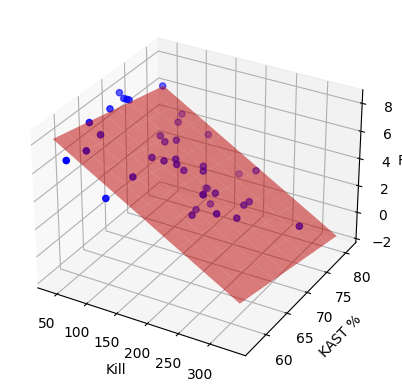

In [52]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset['area'], dataset['rooms'], dataset['parking'], label='Actual', c='blue', marker='o')

age_range = np.linspace(min(dataset['Kill']), max(dataset['Kill']), 10)

bmi_range = np.linspace(min(dataset['KAST %']), max(dataset['KAST %']), 10)

age_range, bmi_range = np.meshgrid(age_range, bmi_range)

insurance_cost_predicted = a[0] + a[1] * age_range + a[2] * bmi_range

ax.plot_surface(age_range, bmi_range, insurance_cost_predicted, alpha=0.5, color='red')

ax.set_xlabel('Kill')

ax.set_ylabel('KAST %')

ax.set_zlabel('Rank')

plt.show()

In [46]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.2  5.  ]
 [5.96 5.  ]
 [5.52 5.  ]
 [1.57 1.  ]
 [3.15 3.  ]
 [3.87 4.  ]
 [5.19 5.  ]
 [3.43 3.  ]]


In [50]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.5183094142135293
Mean Square Error: 0.4001194180272813
Root Mean Square Error: 0.6325499332284221


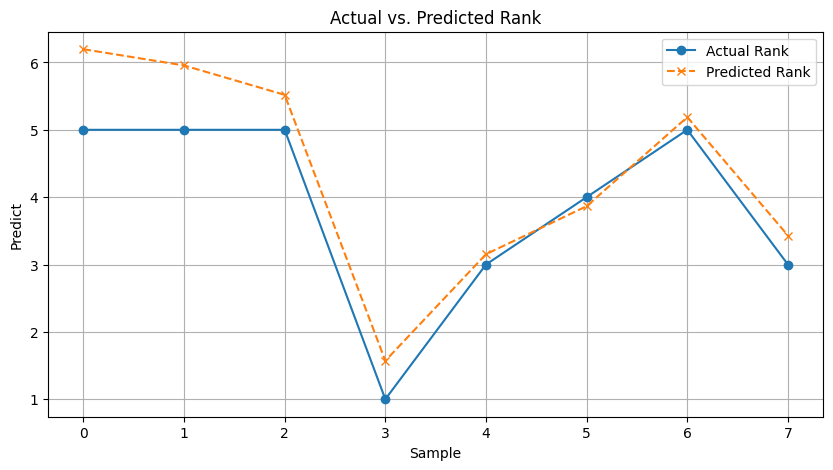

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_test)), y_test, marker='o', label='Actual Rank')
plt.plot(np.arange(len(y_test)), y_pred, marker='x', linestyle='--', label='Predicted Rank')
plt.xlabel('Sample')
plt.ylabel('Predict')
plt.title('Actual vs. Predicted Rank')
plt.legend()
plt.grid(True)
plt.show()